In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
import random

In [2]:
n = 1000
mu = 3.96
x0s = [0.23, 0.34, 0.61, 0.88]

In [3]:
def f(x):
    return mu * x * (1 - x)

def make_seq(x0):
    seq = [x0]
    x_curr = x0
    for i in range(n):
        x_next = f(x_curr)
        seq.append(x_next)
        x_curr = x_next
    return seq

seqs = []
for x0 in x0s:
    seqs.append(make_seq(x0))

In [4]:
def make_plot(x, y):
    plt.plot(x, y)

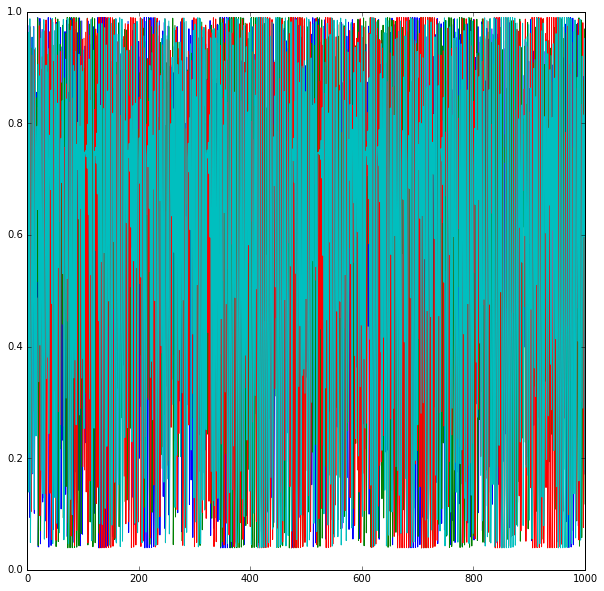

In [5]:
for seq in seqs:
    make_plot(range(len(seq)), seq)

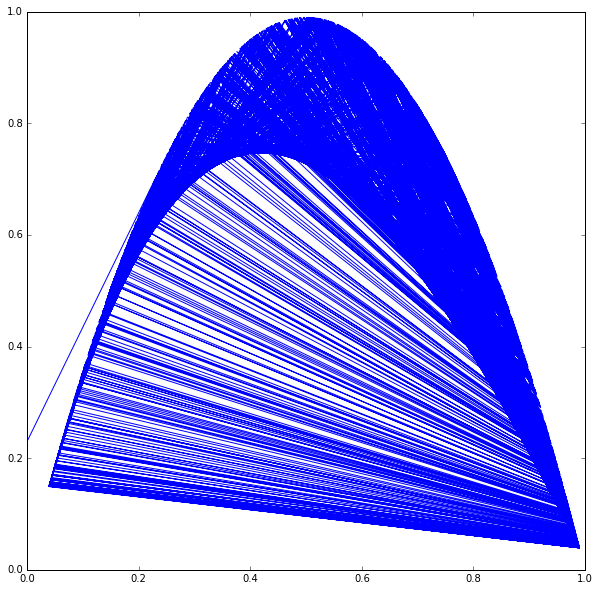

In [6]:
seq = seqs[0]
seq_shifted = seq[:]
seq_shifted.insert(0, 0)
seq_shifted.pop(-1)

make_plot(seq_shifted, seq)

In [7]:
def make_xy_item(x, y, e):
    x_next = f(x) - e * (f(x) - f(y))
    y_next = f(y) + e * (f(x) - f(y))
    return x_next, y_next

def make_xy_system(x0, y0, e):
    xs = []
    ys = []
    x_c, y_c = x0, y0    
    for i in range(n):
        x_n, y_n = make_xy_item(x_c, y_c, e)        
        xs.append(x_n)
        ys.append(y_n)
        x_c = x_n
        y_c = y_n
    return xs, ys

In [8]:
es = [i for i in np.arange(0.05, 0.45, 0.04)]
x0, y0 = x0s[0], x0s[1]

xy_seqs = []
for e in es:
    item = (make_xy_system(x0, y0, e), e)    
    xy_seqs.append(item)    

In [9]:
def make_transition_from(xs, ys):
    us = []
    vs = []
    for x, y in zip(xs, ys):
        u = (x + y) / 2
        v = (x - y) / 2
        us.append(u)
        vs.append(v)
    return us, vs

uv_seqs = []
for seq in xy_seqs:
    uv_seqs.append((make_transition_from(*seq[0]), seq[1]))

## ln|v_n|(n)

e=0.05


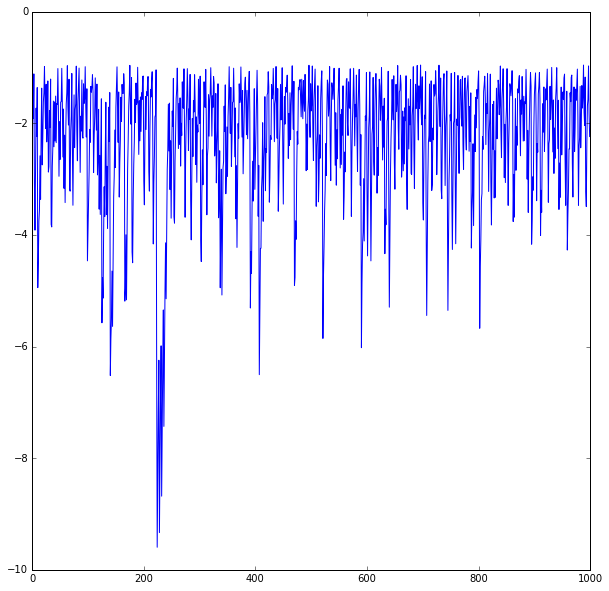

e=0.09


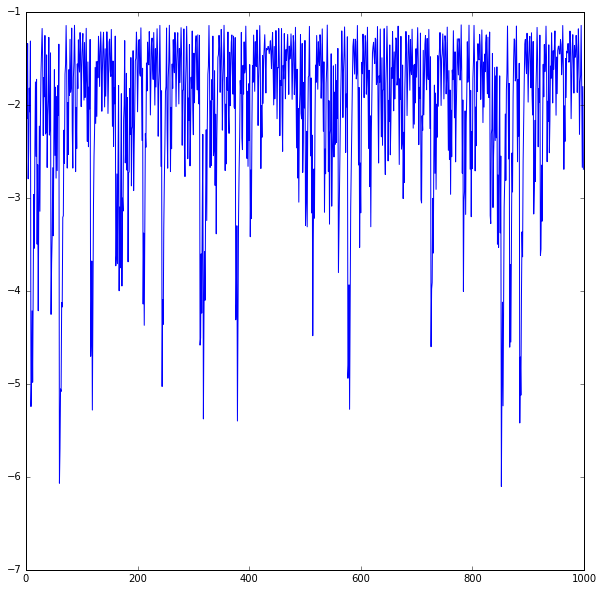

e=0.13


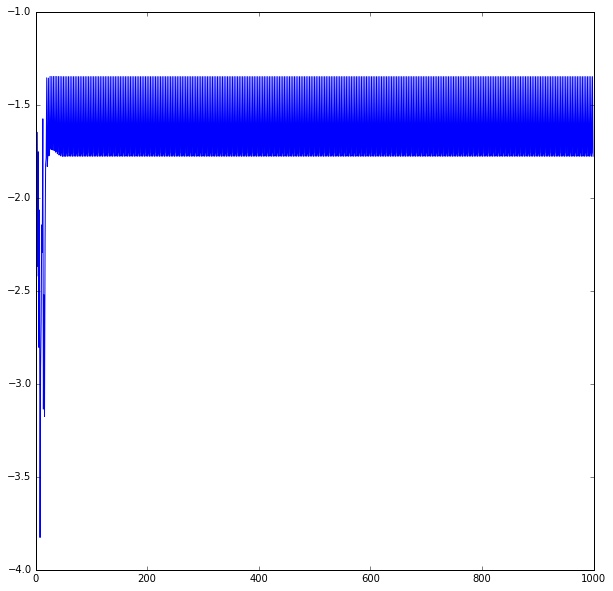

e=0.17


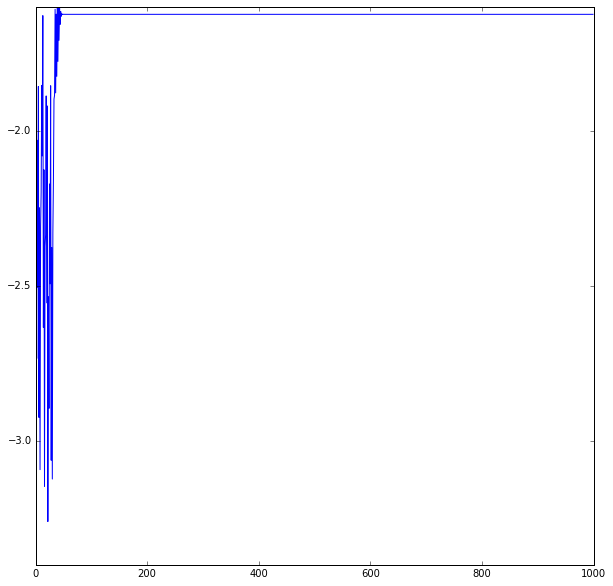

e=0.21


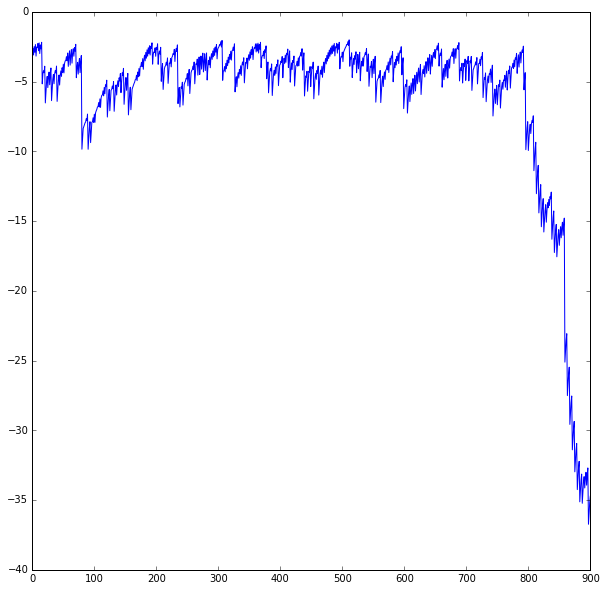

e=0.25


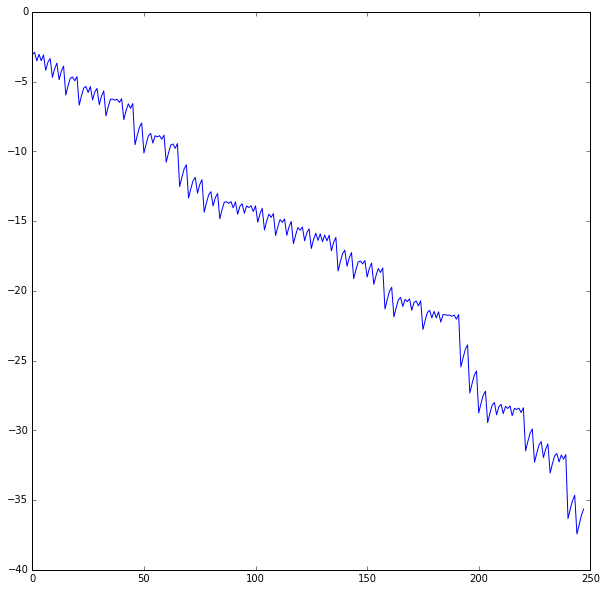

e=0.29


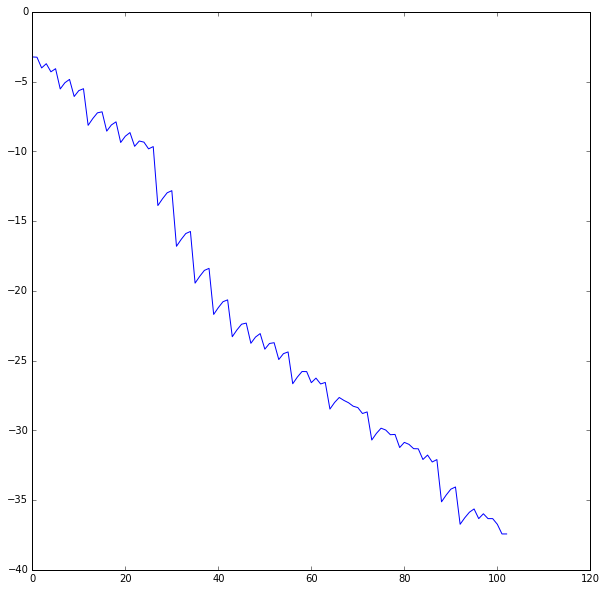

e=0.33


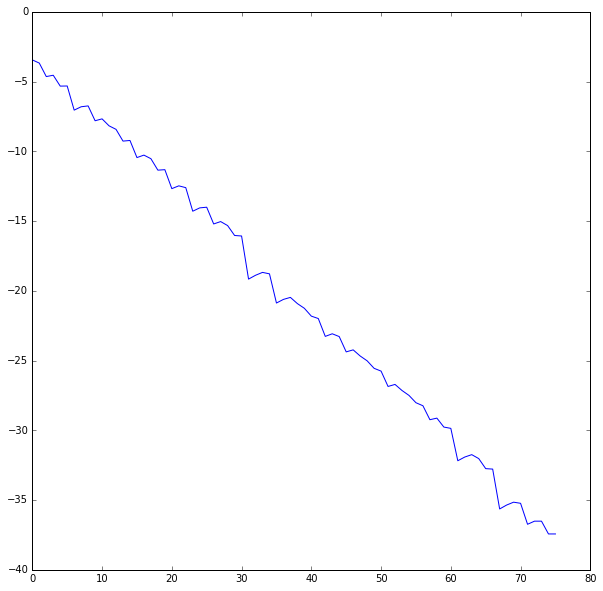

e=0.37


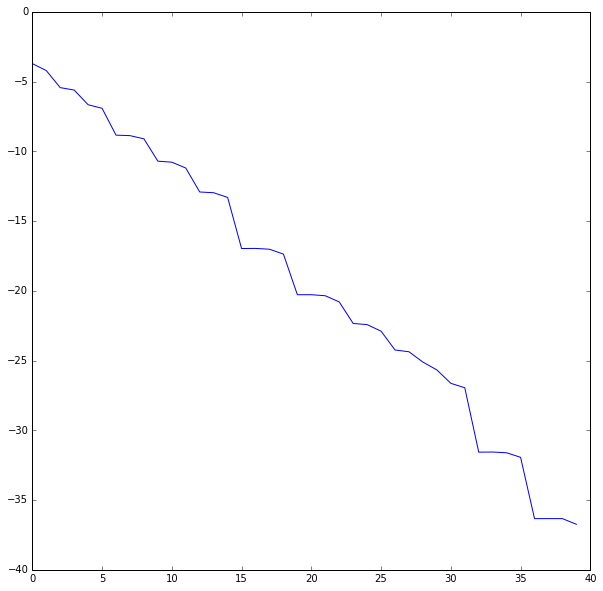

e=0.41


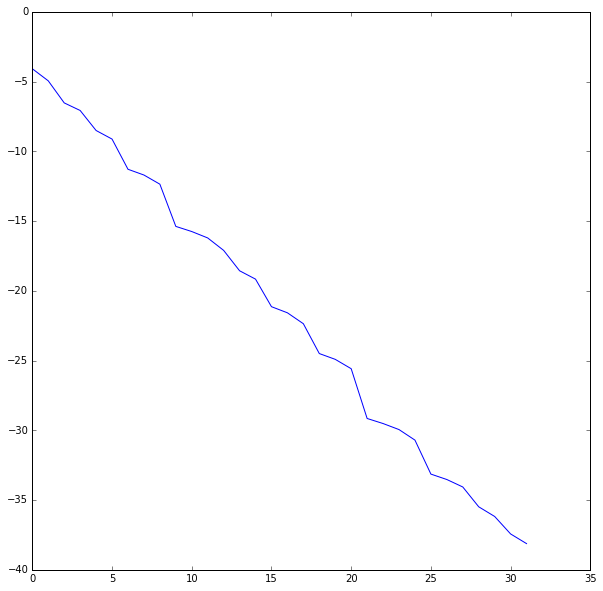

In [10]:
for uv_seq in uv_seqs:
    print('e=%s' % uv_seq[1])
    ## only != 0
    vn = list(filter(lambda x: x != 0, uv_seq[0][1]))
    
    plt.plot(range(len(vn)), [np.log(np.abs(item)) for item in vn])
    plt.show()

## v_n(n), u_n(n)

e=0.05


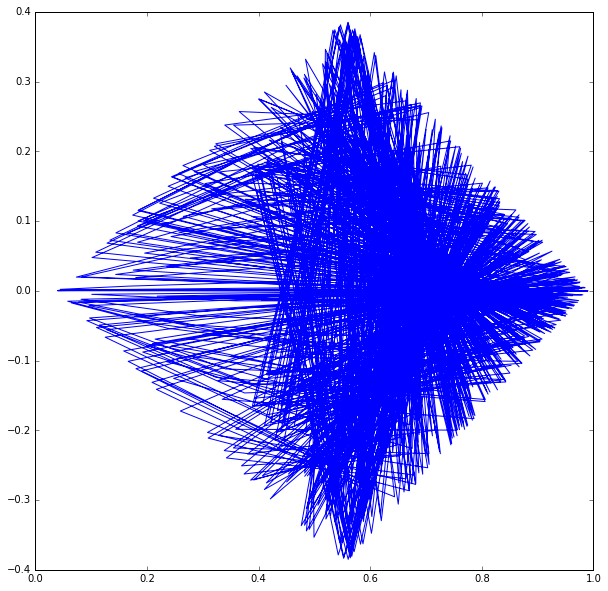

e=0.09


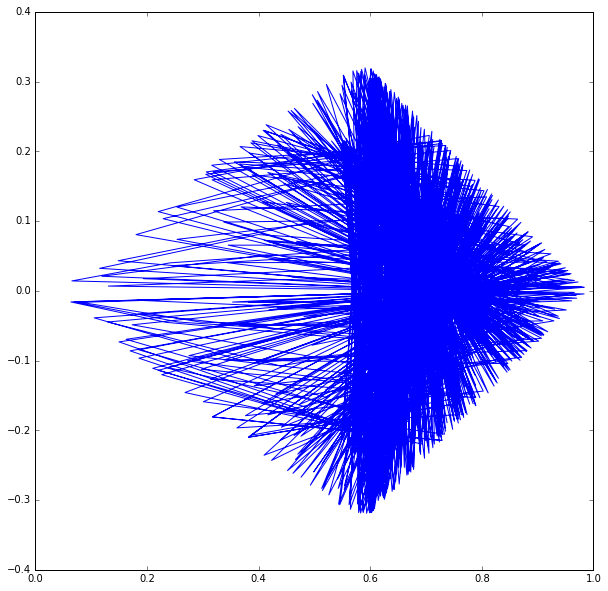

e=0.13


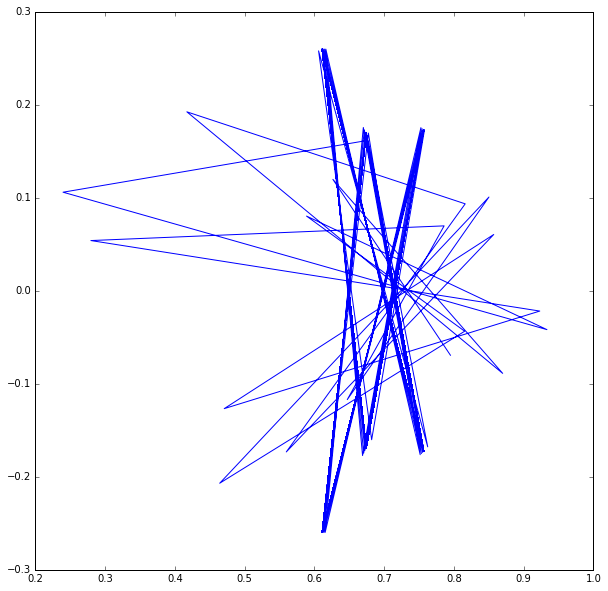

e=0.17


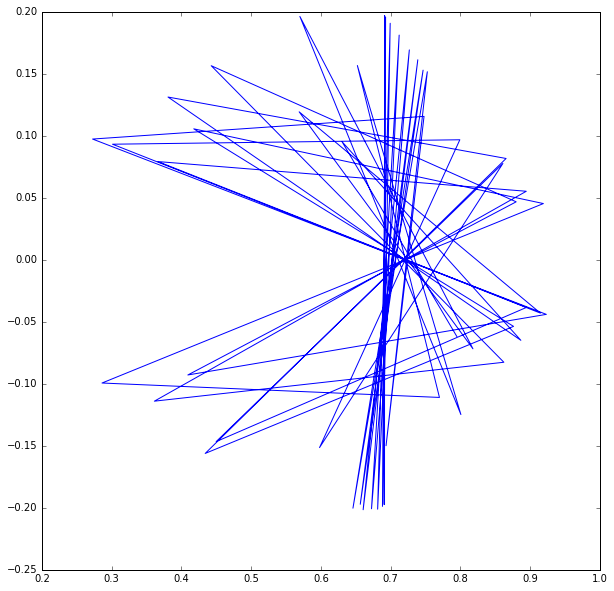

e=0.21


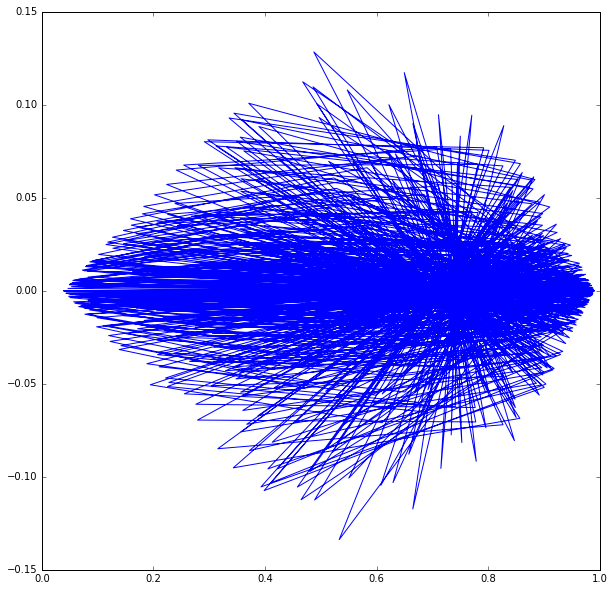

e=0.25


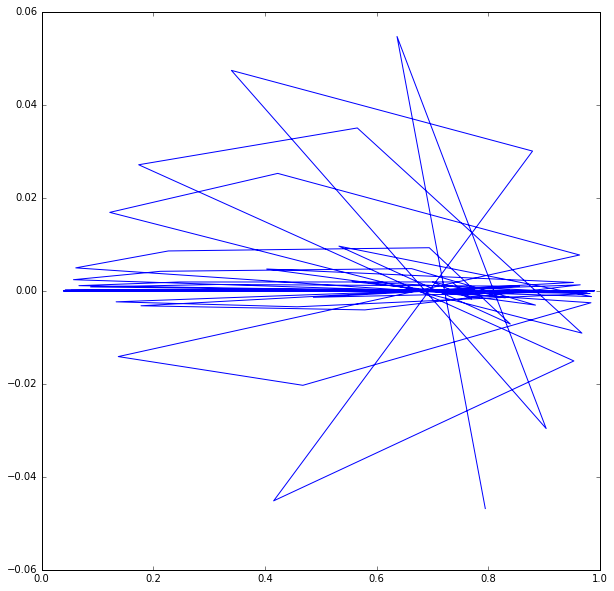

e=0.29


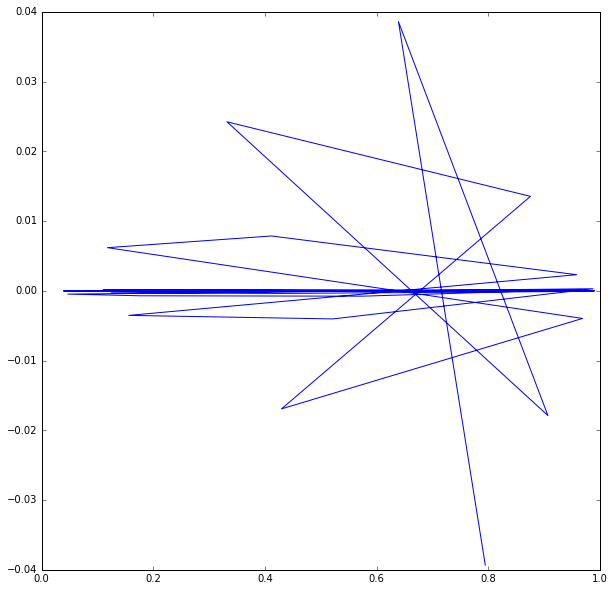

e=0.33


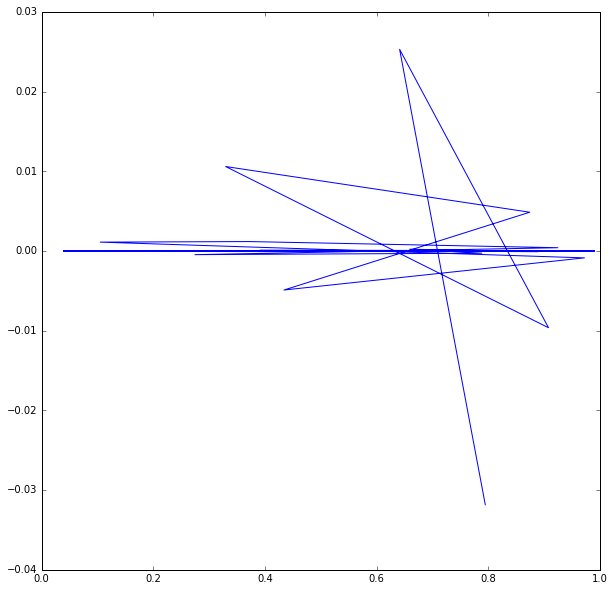

e=0.37


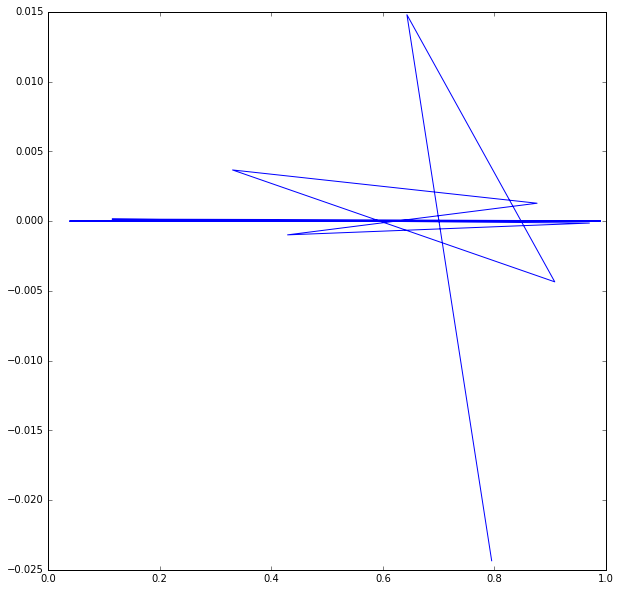

e=0.41


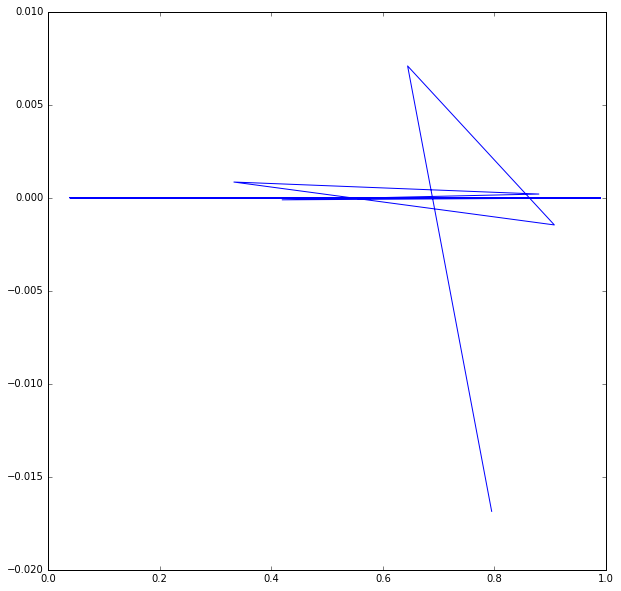

In [11]:
for uv_seq in uv_seqs:
    print('e=%s' % uv_seq[1])
    plt.plot(uv_seq[0][0], uv_seq[0][1])
    plt.show()

## (x_n, y_n)

e=0.05


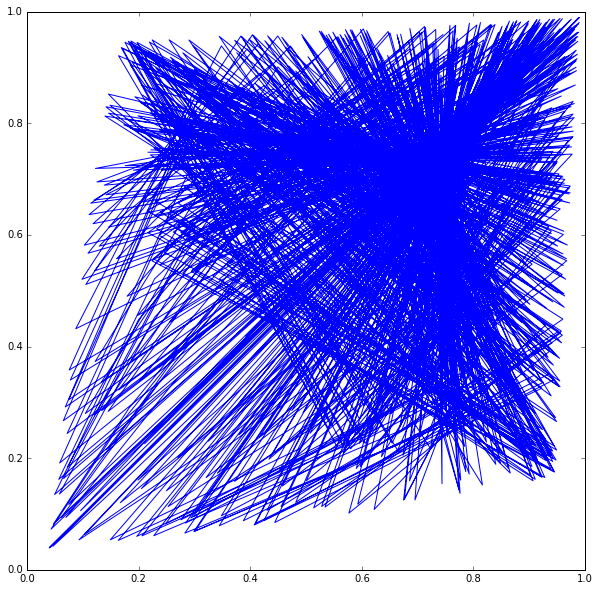

e=0.09


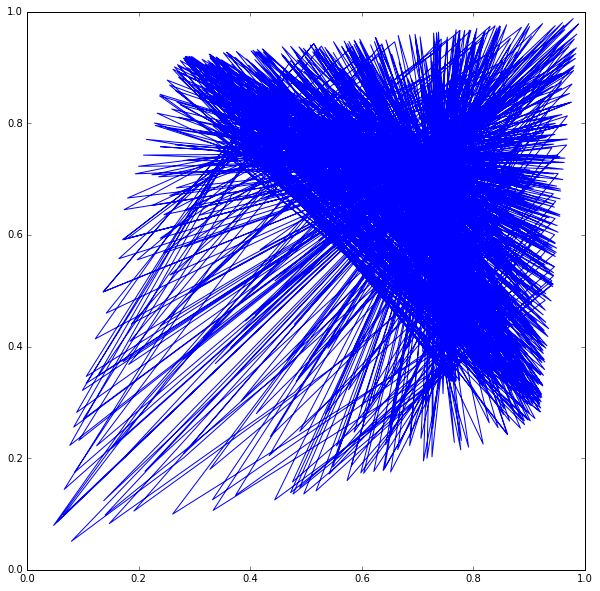

e=0.13


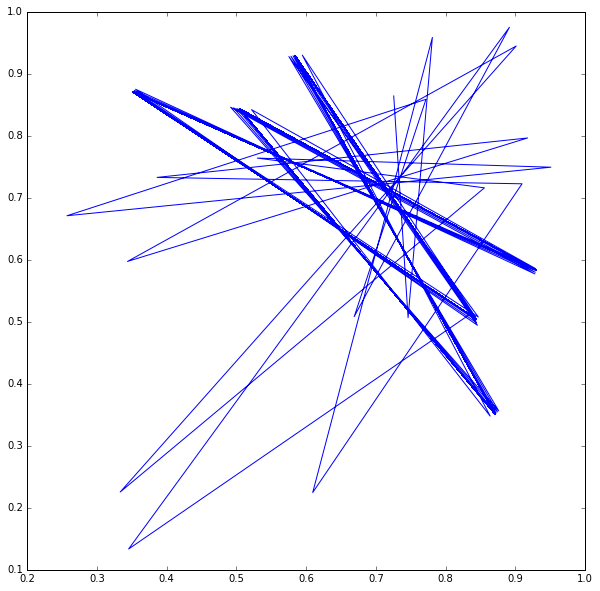

e=0.17


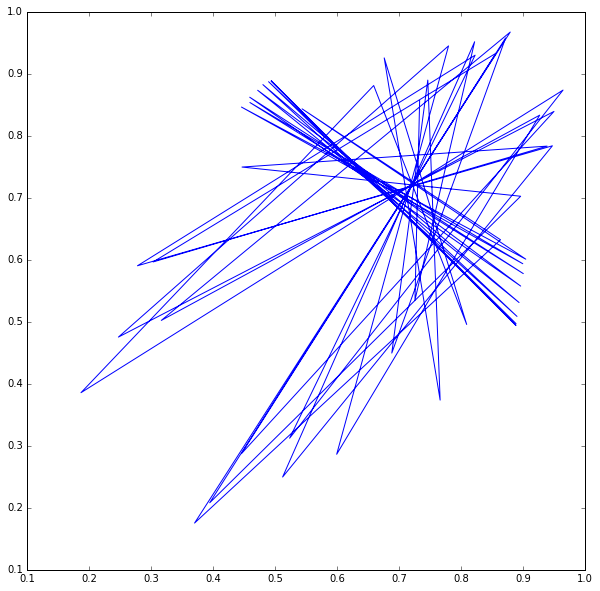

e=0.21


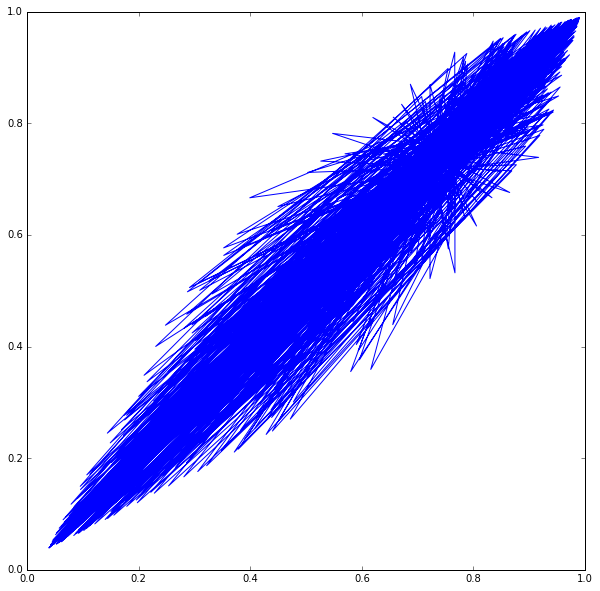

e=0.25


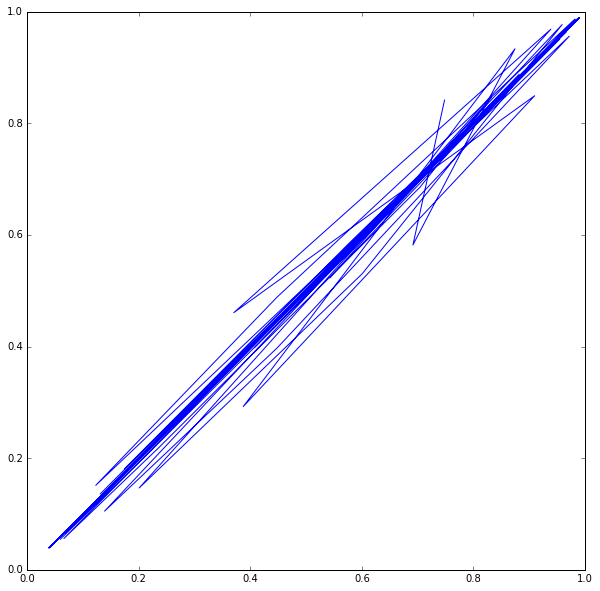

e=0.29


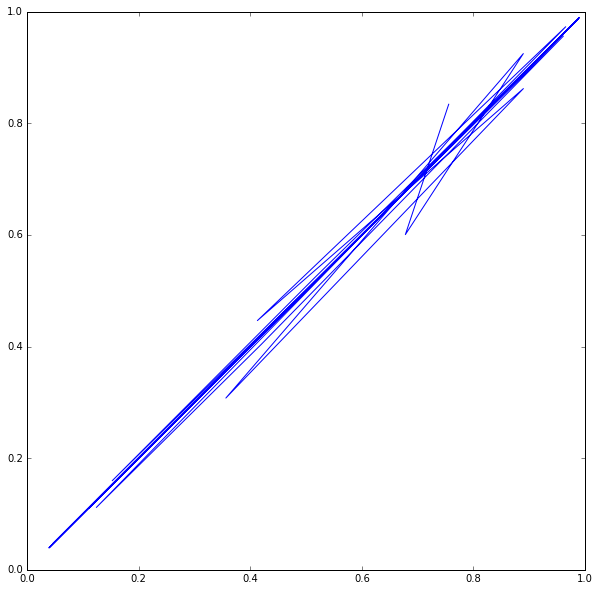

e=0.33


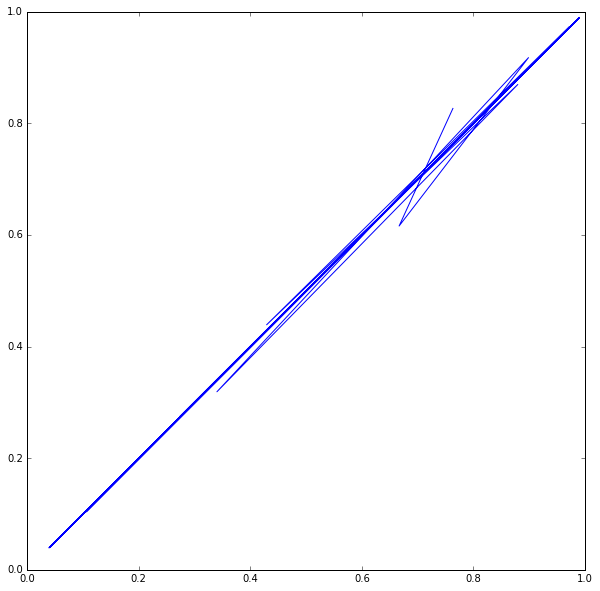

e=0.37


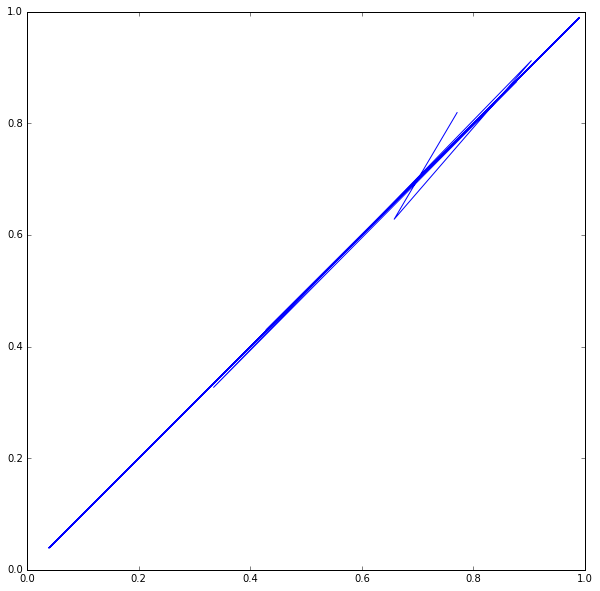

e=0.41


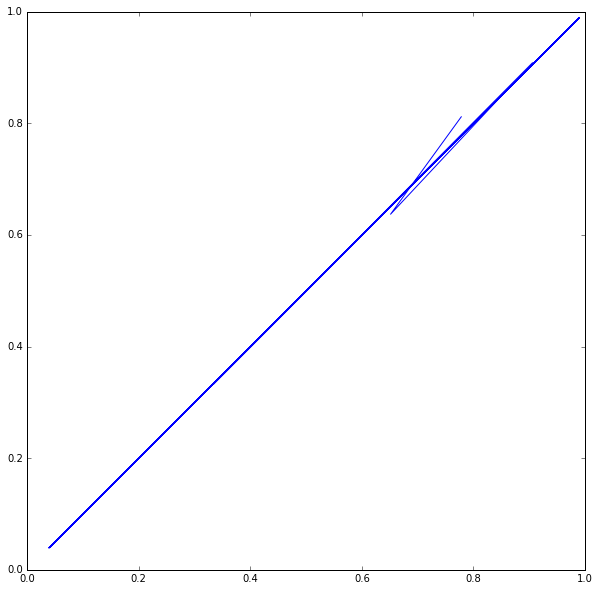

In [12]:
for xy_seq in xy_seqs:
    print('e=%s' % xy_seq[1])
    plt.plot(xy_seq[0][0], xy_seq[0][1])
    plt.show()